#### Student Name: Galina Lopez 
#### Student Number: 10333429
##### Module: Advanced Data Analytics
##### CA1c: Probabilities and Likelihood from Datasets

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

Load the movielens 100k data and join it.

In [2]:
# pass in column names for each CSV and read each file into a Dataframe
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('C:/Users/End-User/Desktop/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('C:/Users/End-User/Desktop/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

m_cols = ['movie_id', 'title' ,'release_date','video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('C:/Users/End-User/Desktop/ml-100k/u.item', sep='|', names=m_cols, 
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.

In [3]:
# Exploring the first five rows of the dataset
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076


In [4]:
# Exploring the last five rows of the dataset
lens.tail()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
99995,748,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,0,1,0,0,0,...,1,0,0,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,1,0,0,0,...,1,0,0,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Peacemaker%2C...,0,1,0,0,0,...,1,1,0,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,1,...,0,0,0,729,1,893286511,19,M,student,56567
99999,901,Mr. Magoo (1997),25-Dec-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,0,...,0,0,0,729,1,893286491,19,M,student,56567


This data set consists of: 100,000 ratings (1-5) from 943 users on 1682 movies. Each user has rated at least 20 movies. 
Simple demographic info for the users (age, gender, occupation, zip).

In [5]:
# Gettng some basic information
lens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 31 columns):
movie_id              100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
imdb_url              99987 non-null object
unknown               100000 non-null int64
Action                100000 non-null int64
Adventure             100000 non-null int64
Animation             100000 non-null int64
Children              100000 non-null int64
Comedy                100000 non-null int64
Crime                 100000 non-null int64
Documentary           100000 non-null int64
Drama                 100000 non-null int64
Fantasy               100000 non-null int64
Film-Noir             100000 non-null int64
Horror                100000 non-null int64
Musical               100000 non-null int64
Mystery               100000 non-null int64
Romance               100000 non-null int64
Sci-Fi      

There are 100,000 rows (every row must have an index).
Our dataset has 31 total columns, one of which isn't populated at all (video_release_date) and two that are missing some values 
(release_date and imdb_url).

In [6]:
# Looking at the descriptive statistics of the numerical attributes in the dataframe
lens.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,unix_timestamp,age
count,100000.000000,0.0,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,100000.000000
mean,425.530130,NaN,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,0.007580,...,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540,462.48475,3.529860,8.835289e+08,32.969850
std,330.798356,NaN,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,0.086733,...,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894,266.61442,1.125674,5.343856e+06,11.562623
min,1.000000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.00000,1.000000,8.747247e+08,7.000000
25%,175.000000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,254.00000,3.000000,8.794487e+08,24.000000
50%,322.000000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,447.00000,4.000000,8.828269e+08,30.000000
75%,631.000000,NaN,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,682.00000,4.000000,8.882600e+08,40.000000
max,1682.000000,NaN,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,943.00000,5.000000,8.932866e+08,73.000000


We can quickly see the average age of our users is just above 34 years old, with the youngest being 7 and the oldest being 73. 
The median age is 31, with the youngest quartile of users being 25 or younger, and the oldest quartile being at least 43.

For each of 2 separate occupations of your choice, boxplot the distribution of scores
for each of 2 genres of your choice.

Boxplots of the distributions of scores for occupations: homemaker versus programmer, for genre: Animation.

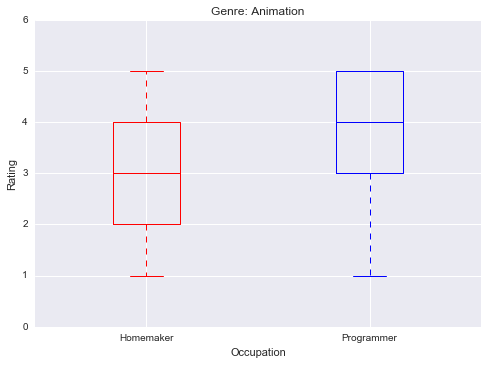

In [7]:
animation_homemaker = lens[(lens.occupation == 'homemaker') & (lens.Animation)]
animation_programmer = lens[(lens.occupation == 'programmer') & (lens.Animation)]

fig = plt.figure()
ax = plt.axes()

animation_homemaker['rating'].plot(kind = 'box',color = 'red', positions = [1], widths = 0.6)
animation_programmer['rating'].plot(kind = 'box',color = 'blue', positions = [3], widths = 0.6)

plt.xlim(0, 4)
plt.ylim(0, 6)
ax.set_title('Genre: Animation')
ax.set_ylabel('Rating')
ax.set_xticklabels(['Homemaker', 'Programmer'])
ax.set_xticks([1, 3])
ax.set_xlabel('Occupation')

From the above boxplots we make some interesting and unexpected findings. Seems that homemakers rate animation movies lower on 
average (taking the median value as average) than programmers, which was suprising to find out at first as I would have assumed 
the contrary beforehand. But then I thought that animation contains children and adult animation, so programmers might be watching 
animes etc and scoring them higher than homemakers tired of maybe watching same cartoons all the time with the children. Just a hypothesis.
So I went further to investigate this hypothesis and plot the boxplots of the distributions of scores for homemaker versus 
programmers for genres: children and animation.

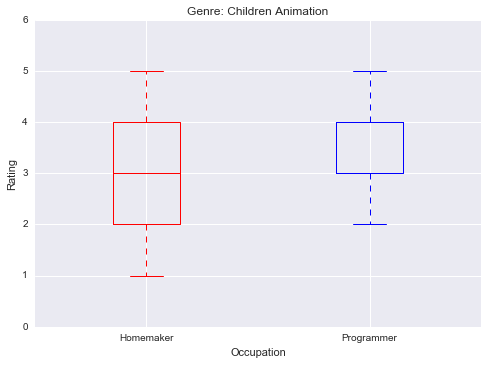

In [8]:
children_animation_homemaker = lens[(lens.occupation == 'homemaker') & (lens.Animation) & (lens.Children)]
children_animation_programmer = lens[(lens.occupation == 'programmer') & (lens.Animation) & (lens.Children)]

fig = plt.figure()
ax = plt.axes()

children_animation_homemaker['rating'].plot(kind = 'box',color = 'red', positions = [1], widths = 0.6)
children_animation_programmer['rating'].plot(kind = 'box',color = 'blue', positions = [3], widths = 0.6)

plt.xlim(0, 4)
plt.ylim(0, 6)
ax.set_title('Genre: Children Animation')
ax.set_ylabel('Rating')
ax.set_xticklabels(['Homemaker', 'Programmer'])
ax.set_xticks([1, 3])
ax.set_xlabel('Occupation')

As we can see while homemakers' distribution of scores have remained the same, the programmers' distributions of scores have 
come down as we would expect. Interesting finding I thought.

Boxplots of the distributions of scores for same occupations: homemaker versus programmer, for a different genre: Documentary.

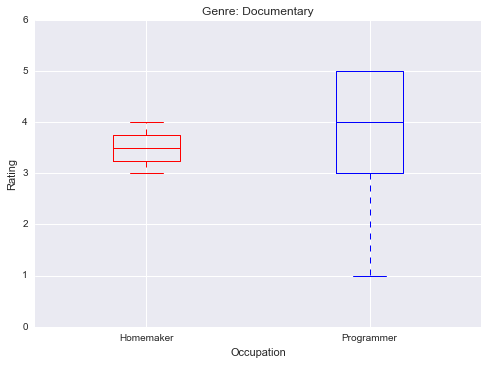

In [9]:
documentary_homemaker = lens[(lens.occupation == 'homemaker') & (lens.Documentary)]
documentary_programmer = lens[(lens.occupation == 'programmer') & (lens.Documentary)]

ax = plt.axes()

documentary_homemaker['rating'].plot(kind = 'box',color = 'red', positions = [1], widths = 0.6)
documentary_programmer['rating'].plot(kind = 'box',color = 'blue', positions = [3], widths = 0.6)

plt.xlim(0, 4)
plt.ylim(0, 6)
ax.set_title('Genre: Documentary')
ax.set_ylabel('Rating')
ax.set_xticklabels(['Homemaker', 'Programmer'])
ax.set_xticks([1, 3])
ax.set_xlabel('Occupation')

From the above boxplots we make some interesting but not unexpected findings. Seems that homemakers rate documentaries lower on 
average (taking the median value as average) than programmers, which is what I expected. 
Homemakers rate documentaries between 3 and 4 with a median of 3.5 in a much smaller spread than programmers which rate 
documentaries higher on average between 1 and 5 with a median of 4 with a much bigger spread of scores. 
Interesting but not unexpected.

Plot a heatmap of user occupation against genre, with the squares of the heatmap coloured
corresponding to the average rating.

In [10]:
# Getting the average rating per genre of each occupation

df_by_occupation_sum = lens.groupby(['occupation'])['unknown', 'Action', 'Adventure',
 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'].sum()

df_by_occupation_sum

def average_rate(ratings):
    return round(((float(ratings[0]) * 1) + (ratings[1] * 2) + (ratings[2] * 3) + (ratings[3] * 4) + (ratings[4] * 5)) / ratings.sum(), 1)

for i in df_by_occupation_sum.index:
    for col in df_by_occupation_sum:
        
        ratings_group = lens[(lens.occupation == i)].groupby(['rating'])[col].sum()
        ratings_values = ratings_group.get_values()
        df_by_occupation_sum.ix[i,col] = average_rate(ratings_values)
        
df_by_occupation_sum

,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
occupation,,,,,,,,,,,,,,,,,,,
administrator,NaN,3.5,3.5,3.7,3.4,3.5,3.7,3.9,3.8,3.5,4.0,3.4,3.6,3.8,3.7,3.7,3.6,3.9,3.7
artist,NaN,3.5,3.6,3.4,3.4,3.5,3.7,4.1,3.8,3.3,4.2,3.5,3.4,3.8,3.7,3.8,3.6,3.9,3.9
doctor,NaN,3.6,3.6,3.4,3.5,3.6,3.8,3.5,3.8,3.0,4.1,3.5,3.6,4.0,3.7,3.5,3.8,4.2,3.8
educator,3.0,3.6,3.6,3.6,3.4,3.6,3.8,3.8,3.8,3.5,4.1,3.2,3.6,3.8,3.8,3.6,3.6,3.9,3.9
engineer,3.0,3.5,3.5,3.6,3.4,3.4,3.7,3.7,3.7,3.2,3.9,3.3,3.5,3.6,3.6,3.6,3.5,3.8,3.6
entertainment,4.0,3.4,3.4,3.5,3.1,3.3,3.7,3.9,3.6,3.0,3.9,3.2,3.4,3.5,3.5,3.5,3.4,3.8,3.6
executive,1.0,3.5,3.5,3.6,3.2,3.1,3.5,2.2,3.5,2.8,3.6,3.2,3.6,3.6,3.5,3.6,3.5,3.8,3.7
healthcare,NaN,3.1,3.0,2.9,2.7,2.7,3.0,2.6,3.0,2.8,3.1,2.5,3.3,3.1,3.0,3.0,3.0,3.3,2.8
homemaker,NaN,3.5,3.4,3.1,2.9,3.0,3.4,3.5,3.5,1.7,3.3,3.2,2.8,3.7,3.5,3.2,3.4,3.5,NaN


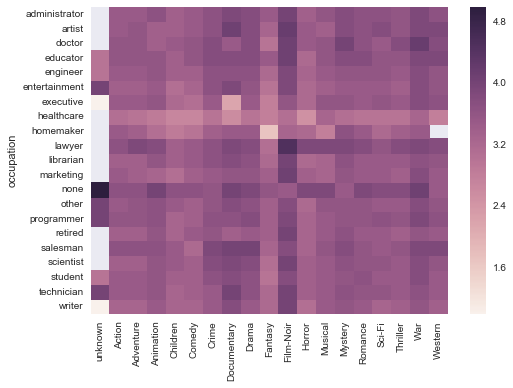

In [11]:
ax = sns.heatmap(df_by_occupation_sum)

The heatmap shows a comparison between each genre and each occupation with the color of the squares corresponding to the 
average score rating. The darker the color the higher the average rating and viceversa. This kind of data visualisation can be 
very useful in identifying segments of the population (occupations in this case) with specific likes and dislikes so they can 
be targetted more efficiently by the company.

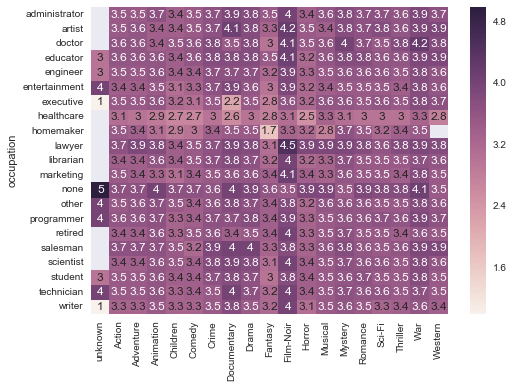

In [12]:
ax = sns.heatmap(df_by_occupation_sum, annot=True)

This heatmap shows the average rating score values as well for each genre by each occupation and was done to check out results.

Develop a logistic regression model to predict users’ gender based on the
average rating they give each genre of movie.

In [16]:
# Getting the average rating per genre of each user

genrecols = ['unknown', 'Action', 'Adventure', 'Animation',
             'Children', 'Comedy', 'Crime', 'Documentary',
             'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
             'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
             'Thriller', 'War', 'Western']

# reshape df by melting (wide to long), selecting only needed fields   
mdf = pd.melt(lens[['user_id', 'sex', 'rating'] + genrecols], 
              id_vars=['user_id', 'sex', 'rating'], var_name='genre')

# filter for value = 1 and four needed columns
mdf = mdf[mdf['value']==1][['user_id', 'sex', 'rating', 'genre']]

# run pivoted aggregation    
lens = pd.pivot_table(mdf, columns = ['genre'], index = ['user_id', 'sex'], 
                    values = ['rating'], aggfunc = np.mean)

print lens

               rating                                                    \
genre          Action Adventure Animation  Children    Comedy     Crime   
user_id sex                                                               
1       M    3.333333  2.928571  3.333333  2.200000  3.472527  3.440000   
2       F    3.800000  4.333333  4.000000  3.000000  3.812500  3.777778   
3       M    2.785714  3.500000       NaN       NaN  2.583333  3.000000   
4       M    3.875000  3.500000       NaN       NaN  5.000000  4.750000   
5       F    3.142857  3.242424  3.785714  2.448276  3.000000  3.888889   
6       M    3.360000  3.454545  3.400000  3.050000  3.500000  3.714286   
7       M    3.884211  4.000000  4.461538  4.055556  3.829545  4.000000   
8       M    4.076923  3.823529       NaN  1.333333  2.400000  4.111111   
9       M    5.000000  5.000000       NaN       NaN  4.500000       NaN   
10      M    4.280000  4.357143  4.142857  4.250000  3.936170  4.500000   
11      F    3.060606  3.

In [17]:
# Implementing a logistic regression model to predict users’ gender based on the average rating they give each genre 

from sklearn import cross_validation as cv
from sklearn.linear_model import LogisticRegression

# reset index and fill missing values with 0 in our dataframe
lens.reset_index(inplace=True) 
lens.fillna(0, inplace=True)

# add a new column containing equivalent binary values of sex column to perform logistic regression on
lens['sex'] = lens['sex'].astype('category')
lens['binary_sex'] = lens['sex'].cat.codes

def calculate_prob(percentage):
    
    # split data into train and test set by a particular percentage split
    train_data, test_data = cv.train_test_split(lens[['rating', 'binary_sex']], test_size = percentage)
    
    train_y = train_data['binary_sex'] # set the label          
    train_x = train_data[['rating']] # set the predictors    

    test_y = test_data['binary_sex'] # set the label 
    test_x = test_data[['rating']] # set the predictors  

    # set up and train the logistic regression model
    logistic = LogisticRegression()
    logistic.fit(train_x, train_y)
    # predict the labels of the test set
    logistic.predict(test_x)
    # return the score of the model on the test set and predictive coefficients
    return (logistic.score(test_x, test_y), logistic.coef_)


test_values = [.05, .1, .15, .2, .21, .22, .23, .24, .25, .26, .27, .28, .29, .30]
outcomes = []
for value in test_values:
    
    probs = []
    coefs = []
    for i in xrange(20):
        data = calculate_prob(value)
        probs.append(data[0])
        coefs.append(data[1])
    values = np.array(probs)
    outcomes.append((value, np.mean(values), np.std(values), probs, coefs))

print outcomes

[(0.05, 0.71666666666666667, 0.053277966052268422, [0.72916666666666663, 0.79166666666666663, 0.77083333333333337, 0.70833333333333337, 0.6875, 0.72916666666666663, 0.70833333333333337, 0.70833333333333337, 0.77083333333333337, 0.70833333333333337, 0.66666666666666663, 0.72916666666666663, 0.70833333333333337, 0.64583333333333337, 0.625, 0.60416666666666663, 0.79166666666666663, 0.72916666666666663, 0.70833333333333337, 0.8125], [array([[-0.05882235,  0.16758946,  0.08966958, -0.25641207,  0.07800132,
         0.00312791,  0.02332728,  0.17160785, -0.00377092,  0.12086155,
        -0.03715527, -0.12841804, -0.0435866 , -0.49514934,  0.24475464,
         0.03775087,  0.164841  ,  0.14626005,  0.00365422]]), array([[-0.06474144,  0.17515937,  0.08495931, -0.27091847,  0.05428021,
         0.03937568,  0.0150091 ,  0.02060203, -0.03388848,  0.10128029,
        -0.04158188, -0.07780535, -0.02338653, -0.35711228,  0.24567378,
         0.0388609 ,  0.12616253,  0.13532813,  0.02772385]]), ar

After optimising our model and examining the above outcomes we decided on a split of 0.1 as it gaves us the best accuracy ie highest average probability of 0.7284 with a low standard deviation of 0.032, well below our acceptable value of 0.05. As we want the most accurate model that can generalise for new data ie doesn't overfit the training data. So we run our model with this optimised split to answer the questions below.

In [18]:
print calculate_prob(0.1)

(0.73684210526315785, array([[ 0.10317598,  0.18237814,  0.07583113, -0.20779717,  0.05343109,
        -0.0183198 ,  0.03424152,  0.22782434, -0.01291821,  0.13197978,
        -0.03855304, -0.08263626, -0.03755334, -0.55529348,  0.18744404,
        -0.01426771,  0.10626208,  0.12847871, -0.00910712]]))


Our first value is the accuracy or probability and the second is an array of the coefficients of our logistic regression model. 
Their order matches each genre as follow: 1st coef - Action, 2nd - Adventure, 3rd - Animation, 4rd - Children, 5th - Comedy,
6th - Crime, 7th - Documentary, 8th - Drama, 9th - Fantasy, 10th - Fimn-Noir, 11th - Horror, 12th - Musical, 13th - Mystery, 
14th - Romance, 15th - Sci-Fi, 16th - Thriller, 17th - War, 18th - Western and 19th - unknown.

Say which genre scores are most predictive of gender, based on the
coefficients of the logistic regression model.

I examined the coefficients of our logistic regression model and decided to take the ones with absolute value above 0.1 as 
the ones most predictive of user gender. Since python assigned the value of 0 to females and 1 to males, negative coefficients 
are indicative of females and positive coefficients of males. As negative values will decrease the y value towards 0 ie female 
and viceversa. Hence I found out that Romance, Drama, Children, Sci-Fi, Adventure, Film-Noir, Western, War and Ation were the genre most predictive of gender. With Romance and Children being the most predictive of females and the rest of males.

Report the accuracy of the logistic regression method.

The accuracy of our logistic regression method on the optimised split of 0.1 was on average (20 iterations) 0.7284 with a standard deviation of 0.032 which is indicative of our model being able to generalise ie not overfitting the data. So our model is 72.84% successful in predicting the user's gender from the average rating they give each genre of movie. On average we successfully predicted 7 out of 10 users. Not bad.